# Cluster comparison: TCR vs. Tucker
This file compares both clustering results on Tucker decomposition and on TCR metrics data. 


To assess the similarity between two clustering results, we use the **Normalized Mutual Information (NMI)** score from `sklearn.metrics`. NMI quantifies the amount of mutual dependence between the two clusterings, adjusted for chance. NMI ranges from **0** (no mutual information) to **1** (perfect agreement), and is invariant to label permutations.

We use this metric to compare clusterings derived from different input features — for example, repertoire diversity metrics vs. tensor decomposition.

>Source: Scikit-learn documentation  
> [`sklearn.metrics.normalized_mutual_info_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html)


## Imports

In [11]:
import pandas as pd
from sklearn.metrics import normalized_mutual_info_score

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [12]:
plt.rcParams.update({
    "font.size": 15,       # Default text size
    "axes.titlesize": 17,  # Title size
    "axes.labelsize": 15,  # X and Y label size
    "xtick.labelsize": 12, # X tick labels
    "ytick.labelsize": 13, # Y tick labels
    "legend.fontsize": 15,  # Legend text size
    "lines.linewidth": 3  # Increase line thickness
})

## Numerical comparison

In [13]:
# Define tensor-specific k ranges
tensor_k_ranges = {
    'tensor_70': range(1, 10),
    'tensor_100': range(1, 10),
    'tensor_200': range(1, 10),
    'tensor_300': range(1, 7)
}

# Collect NMI scores
nmi_results = []

# Loop over tensors and k values
for tensor, k_range in tensor_k_ranges.items():
    for k in k_range:
        try:
            # File paths
            tcr_path = f'Clust_Results/labels_TCR_metrics_{tensor}_k{k}.csv'
            tucker_path = f'Clust_Results/labels_Tucker_{tensor}_k{k}.csv'

            # Load CSVs
            tcr = pd.read_csv(tcr_path)
            tucker = pd.read_csv(tucker_path)

            # Merge and compute NMI
            merged = pd.merge(tcr, tucker, on='patient', suffixes=('_tcr', '_tucker'))
            nmi = normalized_mutual_info_score(merged['cluster_tcr'], merged['cluster_tucker'])

            # Store result
            nmi_results.append({
                'tensor': tensor,
                'k': k,
                'nmi': nmi
            })

            print(f"{tensor} | k={k} | NMI = {nmi:.4f}")

        except FileNotFoundError as e:
            print(f"Skipping {tensor} k={k}: {e}")

# Convert to DataFrame
nmi_df = pd.DataFrame(nmi_results)
nmi_df.to_csv('nmi_comparison_all_tensors.csv', index=False)


tensor_70 | k=1 | NMI = 1.0000
tensor_70 | k=2 | NMI = 0.0008
tensor_70 | k=3 | NMI = 0.2138
tensor_70 | k=4 | NMI = 0.5359
tensor_70 | k=5 | NMI = 0.4955
tensor_70 | k=6 | NMI = 0.5325
tensor_70 | k=7 | NMI = 0.6442
tensor_70 | k=8 | NMI = 0.6939
tensor_70 | k=9 | NMI = 0.7579
tensor_100 | k=1 | NMI = 1.0000
tensor_100 | k=2 | NMI = 0.0501
tensor_100 | k=3 | NMI = 0.2457
tensor_100 | k=4 | NMI = 0.3945
tensor_100 | k=5 | NMI = 0.4765
tensor_100 | k=6 | NMI = 0.5505
tensor_100 | k=7 | NMI = 0.7064
tensor_100 | k=8 | NMI = 0.8247
tensor_100 | k=9 | NMI = 0.9294
tensor_200 | k=1 | NMI = 1.0000
tensor_200 | k=2 | NMI = 0.0680
tensor_200 | k=3 | NMI = 0.2993
tensor_200 | k=4 | NMI = 0.4232
tensor_200 | k=5 | NMI = 0.6587
tensor_200 | k=6 | NMI = 0.6512
tensor_200 | k=7 | NMI = 0.8188
tensor_200 | k=8 | NMI = 0.9246
tensor_200 | k=9 | NMI = 1.0000
tensor_300 | k=1 | NMI = 1.0000
tensor_300 | k=2 | NMI = 0.0745
tensor_300 | k=3 | NMI = 0.5679
tensor_300 | k=4 | NMI = 0.5579
tensor_300 | k=5 

## Plots

In [14]:
def save_figure(fig, file_prefix,foldername=None):
    current_path = os.getcwd()
    if foldername==None:
        save_folder = os.path.join(current_path, f'Results/Clust Comparison')
    else:
        save_folder = os.path.join(current_path, f'Results/Clust Comparison/{foldername}')
    os.makedirs(save_folder, exist_ok=True)
    png_path = os.path.join(save_folder, f"{file_prefix}.png")
    pdf_path = os.path.join(save_folder, f"{file_prefix}.pdf")
    fig.savefig(png_path, bbox_inches='tight')
    fig.savefig(pdf_path, bbox_inches='tight')


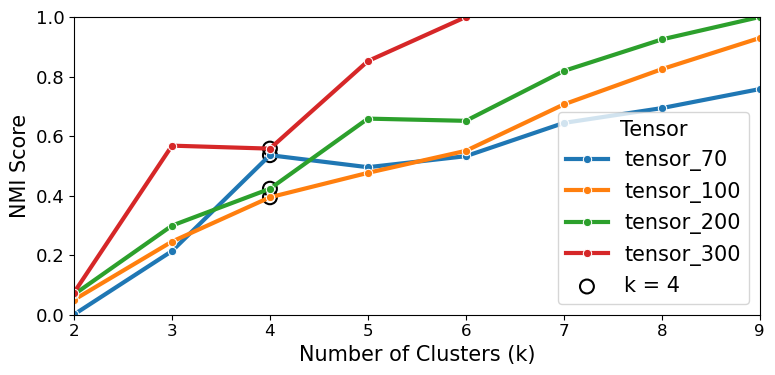

In [15]:
# Load the NMI results
nmi_df = pd.read_csv('nmi_comparison_all_tensors.csv')

# Plot base NMI vs k for each tensor
fig = plt.figure(figsize=(8, 4))
sns.lineplot(data=nmi_df, x='k', y='nmi', hue='tensor', marker='o')

# Highlight k=4 points with larger black-edged circles
highlight_df = nmi_df[nmi_df['k'] == 4]
plt.scatter(
    highlight_df['k'], 
    highlight_df['nmi'], 
    s=100,                    # larger size
    facecolors='none',        # hollow
    edgecolors='black',       # black border
    linewidths=1.5,
    label='k = 4'
)

# Labels and limits
plt.xlabel('Number of Clusters (k)')
plt.ylabel('NMI Score')
plt.ylim(0, 1)
plt.xlim(2, 9)

# Legend and layout
plt.legend(title='Tensor')
plt.tight_layout()

# Save and show
save_figure(fig, 'NMI_for_k_all_tensors', foldername=None)
plt.show()


# GT evaluation

In [16]:
# Fixed value of k
k = 4

# Tensor list
tensors = ['tensor_70', 'tensor_100', 'tensor_200', 'tensor_300']

# Collect results
nmi_results = []

for tensor in tensors:
    try:
        # File paths
        tcr_path = f'Clust_Results/labels_TCR_metrics_{tensor}_k{k}.csv'
        tucker_path = f'Clust_Results/labels_Tucker_{tensor}_k{k}.csv'
        gt_path = f'Clust_Results/labels_GT_{tensor}.csv' 

        # Load
        tcr = pd.read_csv(tcr_path)
        tucker = pd.read_csv(tucker_path)
        groundtruth = pd.read_csv(gt_path)

        # Merge on patient
        merged = tcr.merge(tucker, on='patient', suffixes=('_tcr', '_tucker'))
        merged = merged.merge(groundtruth, on='patient')

        # Compute NMIs
        nmi_tcr_vs_gt = normalized_mutual_info_score(merged['cluster_tcr'], merged['cluster'])
        nmi_tucker_vs_gt = normalized_mutual_info_score(merged['cluster_tucker'], merged['cluster'])
        nmi_tcr_vs_tucker = normalized_mutual_info_score(merged['cluster_tcr'], merged['cluster_tucker'])

        # Store
        nmi_results.append({
            'tensor': tensor,
            'nmi_tcr_vs_groundtruth': nmi_tcr_vs_gt,
            'nmi_tucker_vs_groundtruth': nmi_tucker_vs_gt,
            'nmi_tcr_vs_tucker': nmi_tcr_vs_tucker
        })

        print(f"{tensor} | NMI TCR/GT: {nmi_tcr_vs_gt:.4f} | Tucker/GT: {nmi_tucker_vs_gt:.4f} | TCR/Tucker: {nmi_tcr_vs_tucker:.4f}")

    except FileNotFoundError as e:
        print(f"Skipping {tensor}: {e}")

# Save results
nmi_df = pd.DataFrame(nmi_results)
# nmi_df.to_csv('nmi_comparison_k4.csv', index=False)


tensor_70 | NMI TCR/GT: 0.3017 | Tucker/GT: 0.2268 | TCR/Tucker: 0.5359
tensor_100 | NMI TCR/GT: 0.2918 | Tucker/GT: 0.3252 | TCR/Tucker: 0.3945
tensor_200 | NMI TCR/GT: 0.3697 | Tucker/GT: 0.5285 | TCR/Tucker: 0.4232
tensor_300 | NMI TCR/GT: 0.8975 | Tucker/GT: 0.6151 | TCR/Tucker: 0.5579


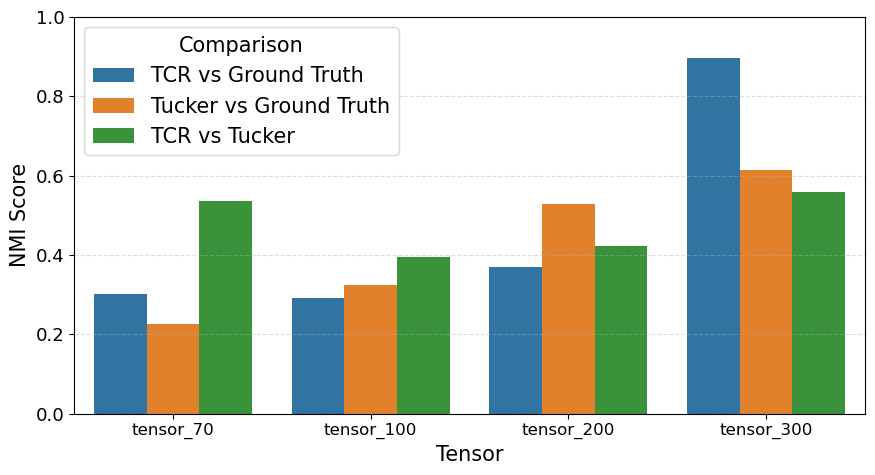

In [17]:

# Melt the dataframe into long format
plot_df = nmi_df.melt(
    id_vars='tensor',
    value_vars=['nmi_tcr_vs_groundtruth', 'nmi_tucker_vs_groundtruth', 'nmi_tcr_vs_tucker'],
    var_name='Comparison',
    value_name='NMI'
)

# Clean label names
plot_df['Comparison'] = plot_df['Comparison'].replace({
    'nmi_tcr_vs_groundtruth': 'TCR vs Ground Truth',
    'nmi_tucker_vs_groundtruth': 'Tucker vs Ground Truth',
    'nmi_tcr_vs_tucker': 'TCR vs Tucker'
})

# Plot
f=plt.figure(figsize=(9, 5))
sns.barplot(data=plot_df, x='tensor', y='NMI', hue='Comparison')

# plt.title('Normalized Mutual Information (NMI) at k=4')
plt.ylim(0, 1)
plt.ylabel('NMI Score')
plt.xlabel('Tensor')
plt.legend(title='Comparison',  loc='best')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.4)
save_figure(f, 'NMI_GT_all_tensors', foldername=None)
plt.show()


To see which patient is in which cluster easily:

In [18]:
# Fixed number of clusters
k = 4

# Tensors to compare
tensors = ['tensor_70', 'tensor_100', 'tensor_200', 'tensor_300']

# Dictionary to store merged DataFrames
merged_results = {}

# Loop through each tensor and merge patient cluster assignments
for tensor in tensors:
    try:
        # File paths
        tcr_path = f'Clust_Results/labels_TCR_metrics_{tensor}_k{k}.csv'
        tucker_path = f'Clust_Results/labels_Tucker_{tensor}_k{k}.csv'
        gt_path = f'Clust_Results/labels_GT_{tensor}.csv' 

        # Load the CSV files
        tcr = pd.read_csv(tcr_path)
        tucker = pd.read_csv(tucker_path)
        groundtruth = pd.read_csv(gt_path)

        # Merge them on patient ID
        merged = tcr.merge(tucker, on='patient', suffixes=('_tcr', '_tucker'))
        merged = merged.merge(groundtruth, on='patient')
        merged = merged.rename(columns={'cluster': 'ground_truth'})

        # Store for display
        merged_results[tensor] = merged

    except FileNotFoundError as e:
        print(f"Skipping {tensor}: {e}")
        merged_results[tensor] = pd.DataFrame()

# Display each merged DataFrame
for tensor, df in merged_results.items():
    print(f"\n=== {tensor} Clustering Comparison ===")
    print(df)



=== tensor_70 Clustering Comparison ===
    patient  cluster_tcr  cluster_tucker ground_truth
0   SARK012            2               0           SD
1   SARK018            3               3           PD
2   SARK019            2               2           CR
3   SARK021            2               0           CR
4   SARK025            2               0           PD
5   SARK027            0               1           PD
6   SARK029            2               0           CR
7   SARK032            0               0           CR
8   SARK033            2               0           CR
9   SARK034            1               2           PD
10  SARK037            2               2           SD
11  SARK041            2               0           CR
12  SARK059            2               2           CR

=== tensor_100 Clustering Comparison ===
    patient  cluster_tcr  cluster_tucker ground_truth
0   SARK012            1               3           SD
1   SARK018            3               2           PD

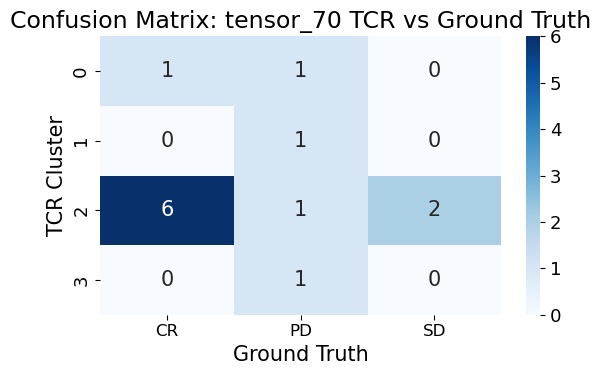

In [19]:
tensor = 'tensor_70'
df = merged_results[tensor]

# Create a confusion matrix (TCR vs Ground Truth)
conf_mat = pd.crosstab(df['cluster_tcr'], df['ground_truth'], rownames=['TCR Cluster'], colnames=['Ground Truth'])

# Visualize as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: {tensor} TCR vs Ground Truth')
plt.tight_layout()
plt.show()


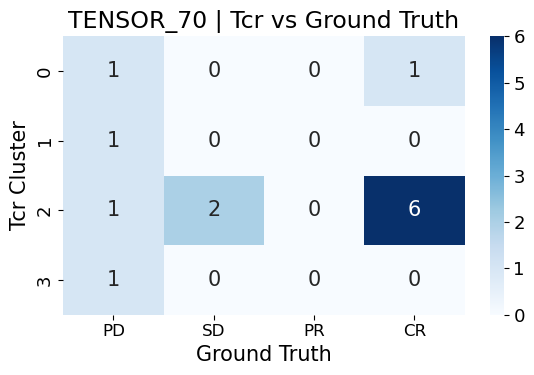

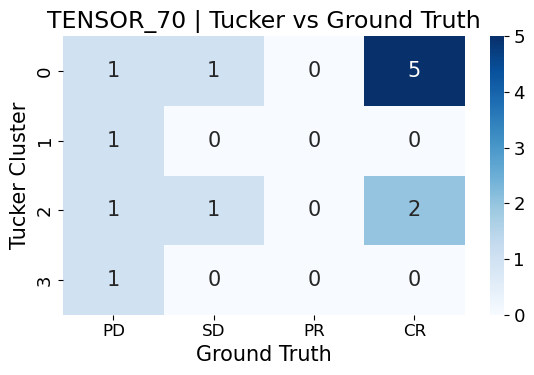

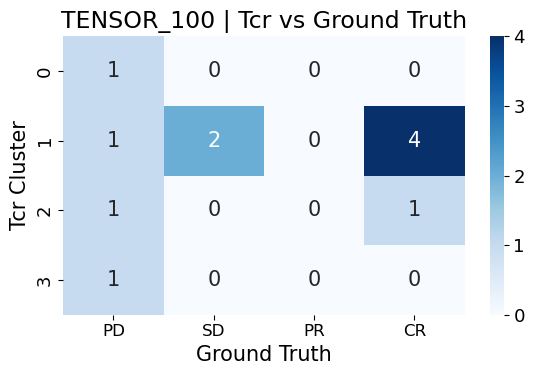

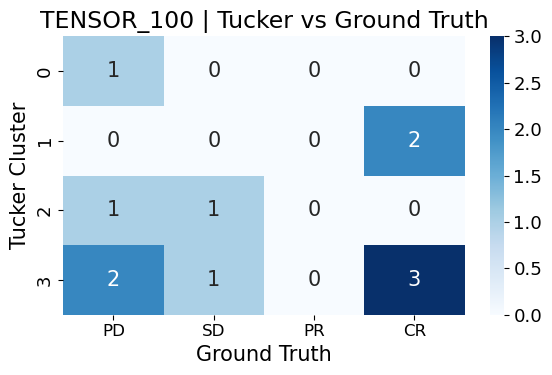

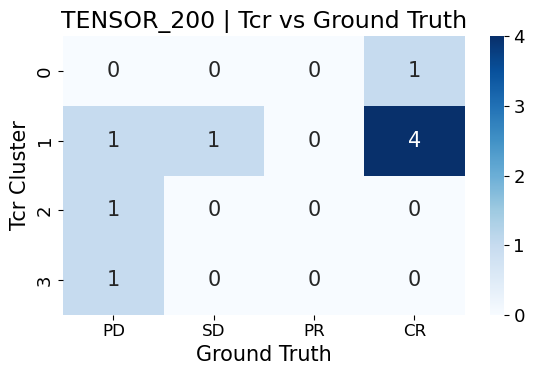

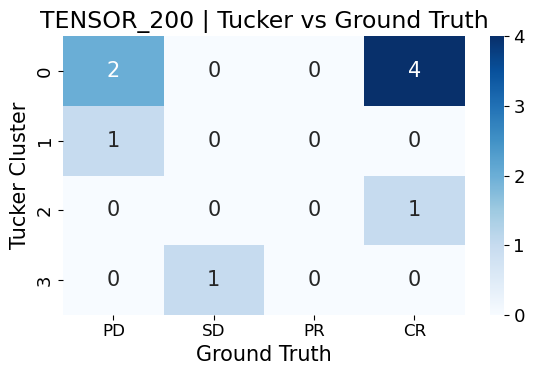

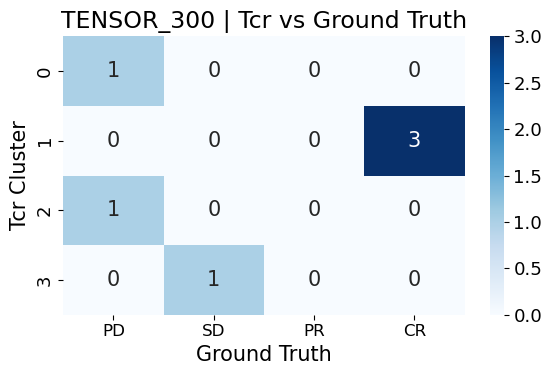

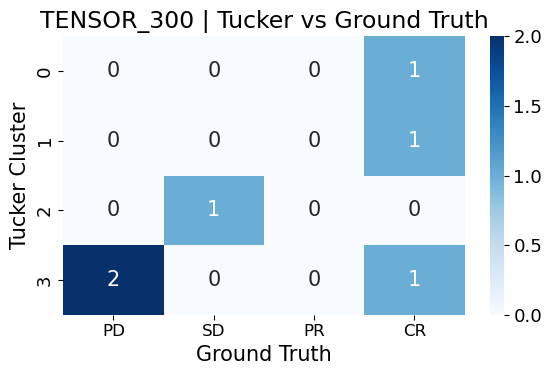

In [20]:
# Loop through each tensor and plot confusion matrices for both clustering methods
for tensor, df in merged_results.items():
    if df.empty:
        continue  # Skip tensors with missing or empty data

    for method in ['cluster_tcr', 'cluster_tucker']:
        method_label = method.split('_')[1].capitalize()  # "Tcr" or "Tucker"
        title = f'{tensor.upper()} | {method_label} vs Ground Truth'

        expected_labels = ['PD', 'SD', 'PR', 'CR']

        conf_mat = pd.crosstab(
            df[method],
            df['ground_truth'],
            rownames=[f'{method_label} Cluster'],
            colnames=['Ground Truth']
        ).reindex(columns=expected_labels, fill_value=0)


        # Plot
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
        plt.title(title)
        plt.tight_layout()
        plt.show()
